# 11/9: Loading random tumor sample 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

%matplotlib inline

In [2]:
dataset = pd.read_csv('halle_hnscc__149-70_HP_IM3_9_[15527.7,13368.3]_cell_seg_data.txt',
            sep='\t')

dataset.head()

,Path,Sample Name,Tissue Category,Cell ID,Total Cells,Tissue Category Area (pixels),Cell Density (per megapixel),Cell X Position,Cell Y Position,Process Region ID,...,"Entire Cell Autofluorescence Total (Normalized Counts, Total Weighting)",Lab ID,Slide ID,TMA Sector,TMA Row,TMA Column,TMA Field,Phenotype,Confidence,inForm 2.1.5430.24864
0,D:\halle validation\analysis 02-23-16 part 1\p...,"halle_hnscc__149-70_HP_IM3_9_[15527.7,13368.3]...",stroma,1,NaN,NaN,NaN,138,3,NaN,...,1041.431,halle_hnscc,149-70,0,0,0,0,NaN,NaN,NaN
1,D:\halle validation\analysis 02-23-16 part 1\p...,"halle_hnscc__149-70_HP_IM3_9_[15527.7,13368.3]...",stroma,2,NaN,NaN,NaN,736,3,NaN,...,764.157,halle_hnscc,149-70,0,0,0,0,NaN,NaN,NaN
2,D:\halle validation\analysis 02-23-16 part 1\p...,"halle_hnscc__149-70_HP_IM3_9_[15527.7,13368.3]...",stroma,3,NaN,NaN,NaN,45,4,NaN,...,999.438,halle_hnscc,149-70,0,0,0,0,NaN,NaN,NaN
3,D:\halle validation\analysis 02-23-16 part 1\p...,"halle_hnscc__149-70_HP_IM3_9_[15527.7,13368.3]...",stroma,4,NaN,NaN,NaN,394,4,NaN,...,1325.802,halle_hnscc,149-70,0,0,0,0,NaN,NaN,NaN
4,D:\halle validation\analysis 02-23-16 part 1\p...,"halle_hnscc__149-70_HP_IM3_9_[15527.7,13368.3]...",tumor,5,NaN,NaN,NaN,695,5,NaN,...,1123.807,halle_hnscc,149-70,0,0,0,0,other,75.36 %,NaN


In [3]:
print dataset.columns.values

['Path' 'Sample Name' 'Tissue Category' 'Cell ID' 'Total Cells'
 'Tissue Category Area (pixels)' 'Cell Density (per megapixel)'
 'Cell X Position' 'Cell Y Position' 'Process Region ID'
 'Distance from Process Region Edge (pixels)' 'Category Region ID'
 'Distance from Tissue Category Edge (pixels)' 'Nucleus Area (pixels)'
 'Nucleus Area (percent)' 'Nucleus Compactness' 'Nucleus Minor Axis'
 'Nucleus Major Axis' 'Nucleus Axis Ratio'
 'Nucleus Alexa 514 Min (Normalized Counts, Total Weighting)'
 'Nucleus Alexa 514 Mean (Normalized Counts, Total Weighting)'
 'Nucleus Alexa 514 Max (Normalized Counts, Total Weighting)'
 'Nucleus Alexa 514 Std Dev (Normalized Counts, Total Weighting)'
 'Nucleus Alexa 514 Total (Normalized Counts, Total Weighting)'
 'Nucleus Alexa 594 Min (Normalized Counts, Total Weighting)'
 'Nucleus Alexa 594 Mean (Normalized Counts, Total Weighting)'
 'Nucleus Alexa 594 Max (Normalized Counts, Total Weighting)'
 'Nucleus Alexa 594 Std Dev (Normalized Counts, Total Weighti

In [4]:
print set(dataset['Phenotype'])

unclassified = dataset[dataset['Phenotype'].isnull()]
foxp3 = dataset[dataset['Phenotype'] == 'foxp3']
pdl1 = dataset[dataset['Phenotype'] == 'pd-l1']
cd4 = dataset[dataset['Phenotype'] == 'cd4']
other = dataset[dataset['Phenotype'] == 'other']
pdmac = dataset[dataset['Phenotype'] == 'pd-l1+ mac']
cd8 = dataset[dataset['Phenotype'] == 'cd8']
tumor = dataset[dataset['Phenotype'] == 'tumor']
print '\nCell counts in the sample: '
print 'unclassified: ', len(unclassified)
print 'foxp3: ', len(foxp3)
print 'pdl1: ', len(pdl1)
print 'cd4: ', len(cd4)
print 'other: ', len(other)
print 'pdmac: ', len(pdmac)
print 'cd8: ', len(cd8)
print 'tumor: ', len(tumor)


set([nan, 'foxp3', 'pd-l1', 'cd4', 'other', 'pd-l1+ mac', 'cd8', 'tumor'])

Cell counts in the sample: 
unclassified:  46
foxp3:  169
pdl1:  1001
cd4:  380
other:  3079
pdmac:  35
cd8:  900
tumor:  82


set([nan, 'foxp3', 'pd-l1', 'cd4', 'other', 'pd-l1+ mac', 'cd8', 'tumor'])

Cell counts in the sample: 
unclassified:  46
foxp3:  169
pdl1:  1001
cd4:  380
other:  3079
pdmac:  35
cd8:  900
tumor:  82

1. If working with fluorescence marker readings, a map is needed between fluorescence markers (Alexa 514, Alexa 594, Coumarin, Cy3, FITC, Cy5, DAPI) and phenotype (listed above).

2. If working with distances between phenotype-labeled cells, Euclidean distances can be obtained through features 'Cell X Position' and 'Cell Y Position'

### Distribution of cells around PD-L1 cells by radius and cell type

In [5]:
# helper functions

def get_position(cell):
    return (cell['Cell X Position'], cell['Cell Y Position'])

def euclid_dist(loc1, loc2):
    return sqrt((loc1[0] - loc2[0]) ** 2 + (loc1[1] - loc2[1])** 2)

In [6]:
pdl1.Confidence = pdl1.Confidence.replace('%','',regex=True).astype('float')/100


C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


thought: is confidence uniformly distributed over distance (easier for analysis if it is)?

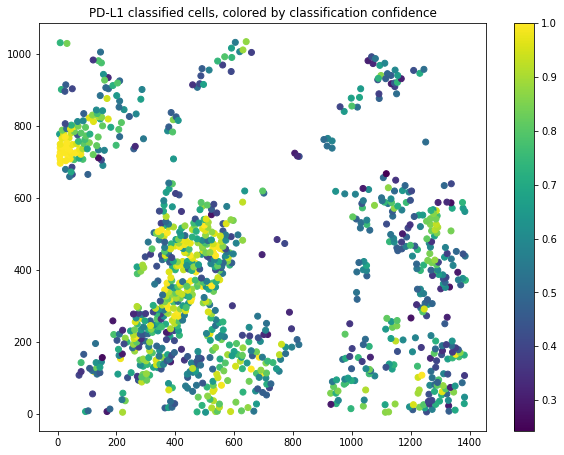

In [7]:
pdl1_mask = pdl1[pdl1.Confidence > 0]

plt.scatter(get_position(pdl1_mask)[0], get_position(pdl1_mask)[1], c=pdl1_mask.Confidence.values)
plt.colorbar()
plt.title('PD-L1 classified cells, colored by classification confidence')
fig = plt.gcf()
fig.set_size_inches(10, 7.5)
plt.savefig('pdl1_confidence.png', format='png', dpi=200)
plt.show()

plotting cells by confidence, clumps of high confidence. importantly many regions have groups of cells classified as pdl1, that in fact don't have high confidence at all.

distribution changes significantly based on what cell is fixed, as can be expected

In [8]:
dataset.Confidence1 = dataset.Confidence.replace('%','',regex=True).astype('float')/100

confident_dataset = dataset[dataset.Confidence1 > 0.7]
confident_dataset.shape

(2114, 160)

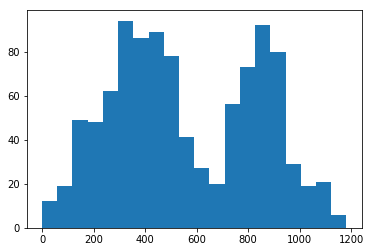

In [9]:
fixed_cell = pdl1.iloc[10]

dists = [euclid_dist(get_position(cell), get_position(fixed_cell)) for i, cell in pdl1.iterrows()]
plt.hist(dists, bins=20)
plt.show()

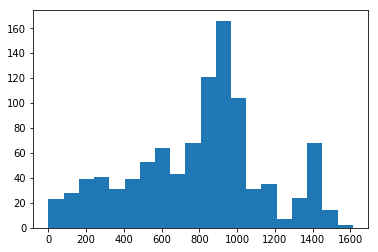

In [10]:
fixed_cell = pdl1.iloc[5]

dists = [euclid_dist(get_position(cell), get_position(fixed_cell)) for i, cell in pdl1.iterrows()]
plt.hist(dists, bins=20)
plt.show()

# 11-16 Continuing exploratory analysis

Next step is exploring the distance distribution of cells around PD-L1

In [10]:
unclassified = confident_dataset[confident_dataset['Phenotype'].isnull()]
foxp3 = confident_dataset[confident_dataset['Phenotype'] == 'foxp3']
pdl1 = confident_dataset[confident_dataset['Phenotype'] == 'pd-l1']
cd4 = confident_dataset[confident_dataset['Phenotype'] == 'cd4']
other = confident_dataset[confident_dataset['Phenotype'] == 'other']
pdmac = confident_dataset[confident_dataset['Phenotype'] == 'pd-l1+ mac']
cd8 = confident_dataset[confident_dataset['Phenotype'] == 'cd8']
tumor = confident_dataset[confident_dataset['Phenotype'] == 'tumor']
print '\nCell counts in the sample: '
print 'unclassified: ', len(unclassified)
print 'foxp3: ', len(foxp3)
print 'pdl1: ', len(pdl1)
print 'cd4: ', len(cd4)
print 'other: ', len(other)
print 'pdmac: ', len(pdmac)
print 'cd8: ', len(cd8)
print 'tumor: ', len(tumor)


Cell counts in the sample: 
unclassified:  0
foxp3:  82
pdl1:  452
cd4:  107
other:  1195
pdmac:  1
cd8:  271
tumor:  6



Cell counts in the sample: 
unclassified:  0
foxp3:  82
pdl1:  452
cd4:  107
other:  1195
pdmac:  1
cd8:  271
tumor:  6

Distribution of distances from PDL1 to CD8 cells

In [12]:
ref = cd8
n_pdl1, n_ref = pdl1.shape[0], ref.shape[0]

dist_mat = np.empty((n_pdl1, n_ref))
for i in range(n_pdl1):
    for j in range(n_ref):
        dist_mat[i, j] = euclid_dist(get_position(pdl1.iloc[i]), get_position(ref.iloc[j]))

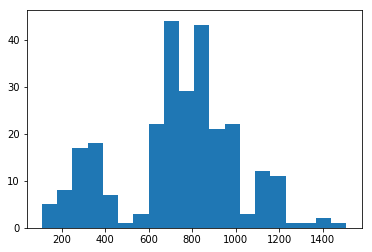

In [17]:
# distribution of distances from a specific pdl1 cell to all cd8 cells
plt.hist(dist_mat[12,:], bins=20)
plt.show()

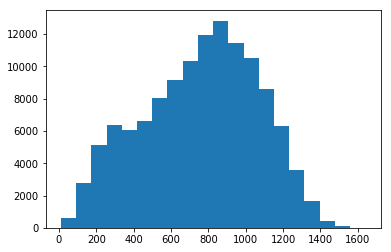

In [14]:
#all distance measures combined into single array
plt.hist(dist_mat.reshape(-1), bins=20)
plt.show()

Repeating this step for distances to CD4 cells

In [35]:
ref = cd4
n_pdl1, n_ref = pdl1.shape[0], ref.shape[0]

dist_mat = np.empty((n_pdl1, n_ref))
for i in range(n_pdl1):
    for j in range(n_ref):
        dist_mat[i, j] = euclid_dist(get_position(pdl1.iloc[i]), get_position(ref.iloc[j]))

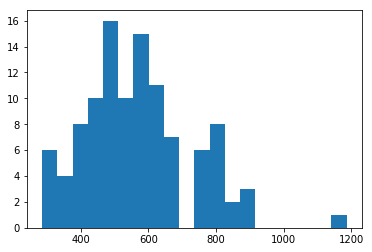

In [36]:
plt.hist(dist_mat[10,:], bins=20)
plt.show()

In [ ]:
#all distance measures combined into single array
plt.hist(dist_mat.reshape(-1), bins=20)
plt.show()

These distributions aggregate all cells together so there is a lot of autocorrelation included. To address this, I will try looking up bootstrapping methods that can sample in ways to minimize effects from autocorrelations in 2-dimensional distances.

Out of curiosity I test the appearance of the distance distribution using a basic bootstrap. 

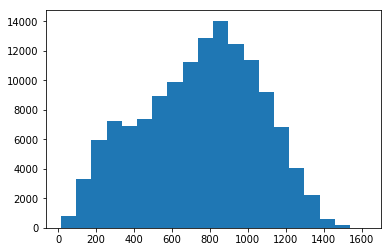

In [29]:
n_obs = dist_mat.shape[0]
n_samples = 500

res = dist_mat[np.random.randint(low=0, high=n_obs), :]
for i in range(n_samples - 1):
    a = np.random.randint(low=0, high=n_obs)
    res = np.concatenate((res, dist_mat[a, :]), axis=0)

plt.hist(res, bins=20)
plt.show()

The issue with producing composite distribution data is that in the process of aggregation, cells near the sides of the image have their distributional information truncated. A count/sum-based aggregation will under-represent large distances from those cells because many cells around those ones will be off the image (truncated). Instead we should have a relative distribution based on e.g. the ratios of distances from those cells, -given- the area around the cell that is actually available to sample from. (or other robust ways to gather information from these cells)

In [106]:
# this code is the basic implementation, runs too slowly to create a complete distance matrix on jupyter

n_cells = dataset.shape[0]

dist_mat = np.empty((n_cells, n_cells))
for i in range(n_cells):
    for j in range(n_cells):
        dist_mat[i, j] = euclid_dist(get_position(dataset.iloc[i]), get_position(dataset.iloc[j]))

KeyboardInterrupt: 

# Spatial statistics


In [20]:
# divide slide into bins and aggregate counts of cells in each bin
X_MAX = 1392
Y_MAX = 1040

print max(confident_dataset['Cell X Position']) # 1388
print max(confident_dataset['Cell Y Position']) # 1035

BIN_SIZE = 100

def bin_cells(input_array, bin_size):
    bins = np.zeros((X_MAX / bin_size + 1, Y_MAX / bin_size + 1))
    for i in range(len(input_array)):
        x, y = get_position(input_array.iloc[i])
        bins[x / bin_size, y / bin_size] += 1
    return bins
    
# for x in range(1, X_MAX + 1, BIN_SIZE):
#     for y in range(1, Y_MAX + 1, BIN_SIZE):
#         bins[x, y] = 
np.set_printoptions(edgeitems=5)
print bin_cells(confident_dataset, BIN_SIZE)

1388
1035
[[ 12.   8.  20.  23.  18.  16.  14.  39.   4.   7.   3.]
 [  5.  19.  19.  16.  21.  20.   9.   6.  14.  15.  13.]
 [ 14.  17.  15.  15.  25.  16.  10.   2.   1.  12.   9.]
 [ 19.  20.  19.  22.  20.  21.  22.   6.   7.  14.   9.]
 [ 14.   9.  17.  29.  30.  19.  19.  16.  15.   8.   2.]
 [ 15.  12.   9.  21.  23.  16.  11.  19.  24.   7.   2.]
 [  6.  13.   7.  20.  16.  13.  21.  23.  26.  18.   3.]
 [ 10.   7.   3.  23.  16.   9.  22.  21.  30.  10.  11.]
 [ 12.  11.  14.  30.  32.  20.  34.  17.  27.  23.  13.]
 [ 13.   6.  14.  24.  27.  16.  12.  17.   9.  12.   4.]
 [  3.   7.  18.   9.  17.   9.   4.  16.   8.   5.   3.]
 [  3.   2.   9.  12.  16.  12.  12.  22.  16.  16.   6.]
 [  9.   7.  11.   7.  10.  16.  22.  20.  21.  11.   1.]
 [  8.   7.   9.   6.   1.   2.   5.   9.  13.   6.   0.]]


In [12]:
pdl1_binned = bin_cells(pdl1, BIN_SIZE)
cd8_binned = bin_cells(cd8, BIN_SIZE)



In [13]:
from scipy.stats import entropy


In [14]:
# entropy 
print entropy(pdl1_binned.reshape(-1))
print entropy(cd8_binned.reshape(-1))

3.82451674494
3.8743338496


In [15]:
# Kullback-leibler divergence, must add pseudo-count to avoid log of 0 
print entropy(pdl1_binned.reshape(-1) + 0.5, cd8_binned.reshape(-1) + 0.5)

2.03435754137


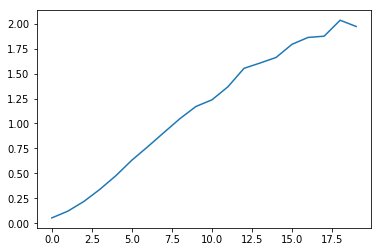

In [26]:
# compute KL divergence over a linespace of bin sizes
KL_array = []
for i in range(10, 110, 5):
    pdl1_tmp = bin_cells(pdl1, i)
    cd8_tmp = bin_cells(cd8, i)
    
    KL_array.append(entropy(pdl1_tmp.reshape(-1) + 0.5, cd8_tmp.reshape(-1) + 0.5))
plt.plot(KL_array)

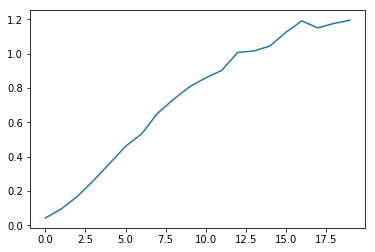

In [27]:
# compute KL divergence over a linespace of bin sizes
KL_array = []
for i in range(10, 110, 5):

    pdl1_tmp = bin_cells(pdl1, i)
    cd8_tmp = bin_cells(cd4, i)
    
    KL_array.append(entropy(pdl1_tmp.reshape(-1) + 0.5, cd8_tmp.reshape(-1) + 0.5))
plt.plot(KL_array)